In [35]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# For clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# For cluster evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# For dimensionality reduction (optional, to visualize high-dimensional data)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Optional: Ignore warnings (helpful during development)
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the dataset into a pandas DataFrame
file_path = 'ML3 data.csv'  # Update the path if needed
data = pd.read_csv(file_path)
data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746
2,73559,8,2,1,72,NaN,3,3,2,NaN,...,-7.187977,-9.730452,9.906254,7.636725,-7.642553,7.356881,-9.626078,3.871285,-1.673816,-3.973037
3,73560,8,2,1,9,NaN,3,3,1,119.0,...,-7.164299,-8.283262,0.184733,1.245878,-9.309774,1.965447,-8.320304,-6.444928,-4.297771,1.870141
4,73561,8,2,2,73,NaN,3,3,1,NaN,...,0.127513,-8.721841,0.013319,3.599418,9.263045,4.388852,6.608509,-6.813265,-9.492588,-0.342957


In [5]:
data.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
count,9813.000000,9813.0,9813.0,9813.000000,9813.000000,642.000000,9813.000000,9813.000000,9813.000000,4213.000000,...,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,8.0,2.0,1.507694,31.629573,10.258567,3.083766,3.277897,1.508509,107.478519,...,-1.868362,-3.024976,0.103960,1.732914,-2.639643,0.516211,0.847771,0.436837,-2.754273,2.018194
std,2938.592266,0.0,0.0,0.499966,24.397553,6.815038,1.262812,1.607957,0.499953,69.774776,...,5.689419,5.572118,5.621485,4.612798,7.025533,5.099966,7.074776,5.891879,5.608956,4.114095
min,73557.000000,8.0,2.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,-9.932773,-9.742275,-9.504686,-9.936065,-9.915099,-9.905405,-9.646950,-9.329935,-9.574369,-9.877965
25%,76092.000000,8.0,2.0,1.000000,10.000000,5.000000,2.000000,2.000000,1.000000,45.000000,...,-7.164033,-8.291340,-6.029267,-1.014871,-9.200133,-2.849344,-8.087627,-6.434927,-7.405031,-0.326282
50%,78643.000000,8.0,2.0,2.000000,27.000000,9.000000,3.000000,3.000000,2.000000,103.000000,...,-3.237602,-4.672666,0.173614,1.830624,-5.338621,1.884456,0.814447,-0.763828,-4.263325,1.885457
75%,81191.000000,8.0,2.0,2.000000,52.000000,16.000000,4.000000,4.000000,2.000000,166.000000,...,1.883083,2.533461,5.417423,4.025792,1.521804,5.003854,8.079576,7.174353,1.071647,4.904403
max,83731.000000,8.0,2.0,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,239.000000,...,9.984094,10.010548,9.933308,9.580645,9.837051,9.202594,9.679657,8.967017,9.944636,8.362119


In [7]:
# Check the shape of the DataFrame
data_shape = data.shape
print("Shape of the DataFrame:", data_shape)

# Calculate the total number of missing values
missing_values = data.isnull().sum().sum()
print("Total missing values:", missing_values)


Shape of the DataFrame: (9813, 662)
Total missing values: 3326124


In [9]:
# Fill any remaining missing values in the entire DataFrame with zeros
data.fillna(0, inplace=True)


In [25]:
data.shape

(9813, 662)

In [27]:
missing_values = data.isnull().sum().sum()
print("Total missing values:", missing_values)
data.describe()
data.shape


Total missing values: 0


(9813, 662)

In [31]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
data_numerical = data[numerical_features]
data_numerical


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,73557,8,2,1,69,0.0,4,4,1,0.0,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
1,73558,8,2,1,54,0.0,3,3,1,0.0,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746
2,73559,8,2,1,72,0.0,3,3,2,0.0,...,-7.187977,-9.730452,9.906254,7.636725,-7.642553,7.356881,-9.626078,3.871285,-1.673816,-3.973037
3,73560,8,2,1,9,0.0,3,3,1,119.0,...,-7.164299,-8.283262,0.184733,1.245878,-9.309774,1.965447,-8.320304,-6.444928,-4.297771,1.870141
4,73561,8,2,2,73,0.0,3,3,1,0.0,...,0.127513,-8.721841,0.013319,3.599418,9.263045,4.388852,6.608509,-6.813265,-9.492588,-0.342957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,8,2,1,26,0.0,2,2,2,0.0,...,-3.769219,-9.083129,-1.236402,-8.082373,-9.093733,3.688105,6.986431,-7.502831,-7.421791,-0.548241
9809,83728,8,2,2,2,24.0,1,1,2,24.0,...,-6.362523,6.958995,6.670261,-0.720513,-5.492617,-9.884320,0.798860,0.170989,-9.063173,1.373097
9810,83729,8,2,2,42,0.0,4,4,2,0.0,...,-8.465361,2.550116,2.792637,1.830711,9.818446,-4.003013,8.856587,8.600473,6.149490,6.456003
9811,83730,8,2,1,7,0.0,2,2,1,84.0,...,-6.364351,6.946665,6.685305,-0.735745,-5.504608,-9.899777,0.805068,0.186107,-9.070253,1.389257


In [39]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_numerical)
scaled_data



array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.54405849e-01, 4.62460300e-02, 8.38868186e-01],
       [9.82897582e-05, 0.00000000e+00, 0.00000000e+00, ...,
        7.02401672e-01, 4.00049080e-01, 2.46392438e-01],
       [1.96579516e-04, 0.00000000e+00, 0.00000000e+00, ...,
        7.21498294e-01, 4.04762063e-01, 3.23733572e-01],
       ...,
       [9.99803420e-01, 0.00000000e+00, 0.00000000e+00, ...,
        9.79966909e-01, 8.05566643e-01, 8.95498514e-01],
       [9.99901710e-01, 0.00000000e+00, 0.00000000e+00, ...,
        5.20088920e-01, 2.58269092e-02, 6.17717687e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.35329582e-01, 1.72188667e-01, 9.21598326e-01]])

In [41]:
silhouette_scores = []
inertia = []
range_clusters = range(2, 11)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertia.append(kmeans.inertia_)


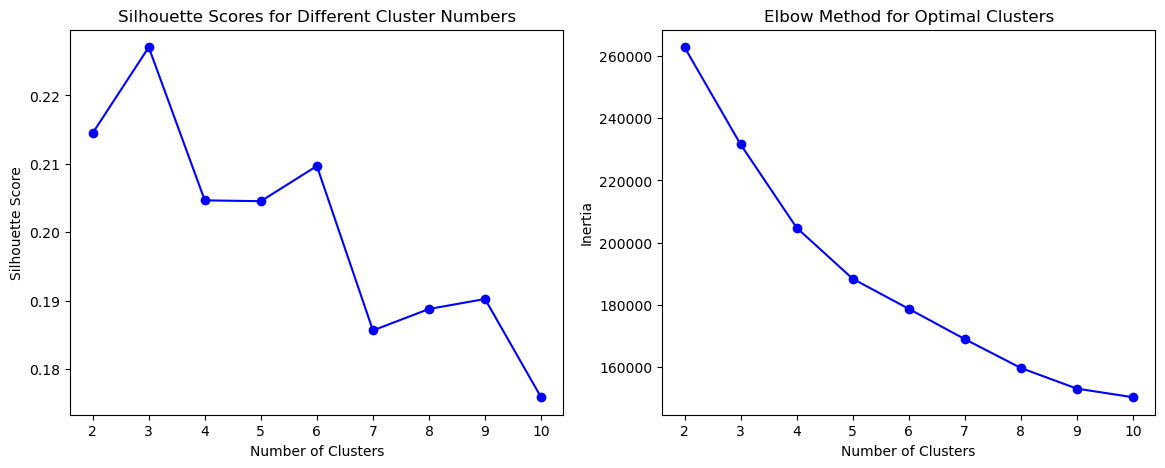

In [42]:
# Plot silhouette scores and inertia for elbow method
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(range_clusters, silhouette_scores, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Cluster Numbers")

plt.subplot(1, 2, 2)
plt.plot(range_clusters, inertia, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [45]:
# Step 7: KMeans Clustering with the optimal number of clusters (assuming 3 as an example)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_labels

array([2, 0, 1, ..., 2, 1, 1])

In [47]:
# Step 8: Correlation Analysis - Analyze correlation of features with cluster labels
data_numerical['Cluster'] = kmeans_labels
correlation = data_numerical.corr()['Cluster'].sort_values(ascending=False)
print("Correlation of Features with Cluster Labels:\n", correlation)



Correlation of Features with Cluster Labels:
 Cluster     1.000000
LBDR64.y    0.623188
LBDR26.y    0.623040
LBDR69.y    0.622991
LBDR11.y    0.622941
              ...   
LBDBPBLC         NaN
LBDBSELC         NaN
LBDBMNLC         NaN
URDUCSLC         NaN
URDUMOLC         NaN
Name: Cluster, Length: 663, dtype: float64


In [49]:
# Step 9: Principal Component Analysis (PCA) - Reduce dimensionality
pca = PCA(n_components=0.95, random_state=42)
principal_components = pca.fit_transform(scaled_data)
print("Explained Variance by PCA:", pca.explained_variance_ratio_)


Explained Variance by PCA: [0.2650302  0.1425204  0.10659664 0.05634027 0.04958783 0.04280196
 0.02522677 0.02031272 0.01495888 0.01430082 0.01300465 0.01089654
 0.01003042 0.00926342 0.00842856 0.00798099 0.00760321 0.00731046
 0.00710683 0.00664695 0.00595182 0.0056218  0.00511046 0.00479919
 0.00412585 0.00398902 0.00393792 0.00377544 0.00355163 0.00331547
 0.00326959 0.00314977 0.00308738 0.00283472 0.00270099 0.00256743
 0.00240263 0.0023492  0.00229017 0.00215916 0.00207224 0.00202939
 0.00200158 0.0019015  0.0018779  0.00176083 0.00173765 0.00169103
 0.00167941 0.00164719 0.00158471 0.00155424 0.00150689 0.00149801
 0.00144099 0.00141724 0.00139591 0.00137786 0.00130827 0.00128725
 0.00128531 0.00125106 0.00122067 0.00121776 0.00119464 0.00117311
 0.00115792 0.00114034 0.00111468 0.00107985 0.00107946 0.00105804
 0.00102355 0.00099309 0.00095852 0.00094569 0.00093695 0.00091168
 0.00086681]


In [51]:
# Step 10: KMeans with PCA-reduced data
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42)
pca_labels = kmeans_pca.fit_predict(principal_components)


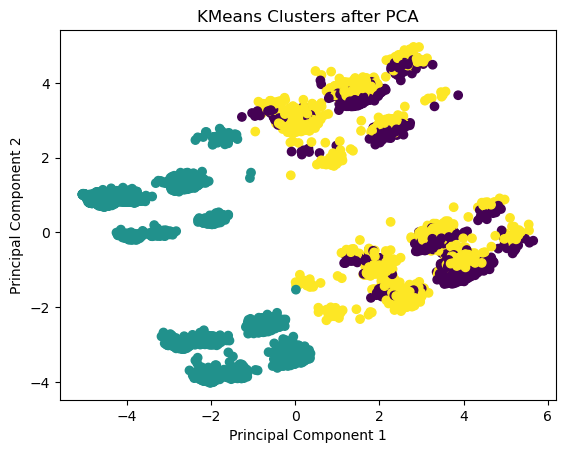

In [53]:
# Visualize clusters in PCA-reduced space
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=pca_labels, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clusters after PCA")
plt.show()


In [55]:
# Step 11: DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(principal_components)

dbscan_labels

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)